# BART Project

## Here we will analyze the occupancy rates of stations according to hours and days

<img src=https://upload.wikimedia.org/wikipedia/commons/b/bf/BART_system_map_effective_June_2003.jpg width='700'>

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [3]:
df=pd.read_csv('date-hour-soo-dest-2016.csv')

In [4]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


In [5]:
df2=pd.read_csv('date-hour-soo-dest-2017.csv')

In [6]:
df2.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2017-01-01,0,12TH,19TH,1
1,2017-01-01,0,12TH,24TH,2
2,2017-01-01,0,12TH,BAYF,1
3,2017-01-01,0,12TH,CIVC,5
4,2017-01-01,0,12TH,COLS,2


In [7]:
df=pd.concat([df,df2])

In [8]:
df.shape

(19947757, 5)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_name'] = df['Date'].dt.day_name()
df.drop('Date', axis=1, inplace=True)

In [10]:
df

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Day,Day_name
0,0,12TH,12TH,1,2016,1,1,Friday
1,0,12TH,16TH,1,2016,1,1,Friday
2,0,12TH,24TH,4,2016,1,1,Friday
3,0,12TH,ASHB,4,2016,1,1,Friday
4,0,12TH,BALB,2,2016,1,1,Friday
...,...,...,...,...,...,...,...,...
9974090,2,WOAK,POWL,3,2018,1,1,Monday
9974091,2,WOAK,RICH,1,2018,1,1,Monday
9974092,2,WOAK,SBRN,1,2018,1,1,Monday
9974093,2,WOAK,SHAY,2,2018,1,1,Monday


In [11]:
df.sample(10)

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Day,Day_name
636024,8,CIVC,SFIA,30,2016,1,25,Monday
209284,0,LAKE,NCON,2,2016,1,9,Saturday
4505929,18,16TH,CONC,33,2016,6,13,Monday
4246547,9,OAKL,MONT,15,2017,6,7,Wednesday
8858826,18,EMBR,ROCK,29,2016,11,19,Saturday
3103948,14,SFIA,WCRK,8,2017,4,26,Wednesday
3989226,17,NBRK,DELN,12,2017,5,28,Sunday
4639827,14,FRMT,WOAK,1,2017,6,21,Wednesday
3499542,20,DBRK,LAFY,4,2017,5,10,Wednesday
3010442,9,SBRN,MLBR,1,2017,4,23,Sunday


In [12]:
    df.isnull().sum()

Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
Year                   0
Month                  0
Day                    0
Day_name               0
dtype: int64

### Which BART station is the busiest?

In [13]:
grouped = df.groupby('Origin Station')['Trip Count'].sum()
grouped1 = df.groupby('Destination Station')['Trip Count'].sum()

toplam=grouped.add(grouped1)
most_busy_station = toplam.idxmax()

print("Busiest station:", most_busy_station)

Busiest station: EMBR


In [14]:
#EMBR is the busiest station


### What is the least popular BART route?

In [15]:
grouped = df.groupby(['Origin Station', 'Destination Station'])['Trip Count'].sum()


# Finding the least popular route
least_popular_route = grouped.idxmin()
least_popular_trip_count = grouped[least_popular_route]

print("Least popular route:", least_popular_route)
print("Number of trips:", least_popular_trip_count)

Least popular route: ('WARM', 'MLBR')
Number of trips: 268


In [16]:
# Minimum route is WARM-MLBR

### When is the best time to find a seat to travel from Berkeley to SF? (DBRK-CIVC)

In [17]:
# Filter trips and passenger hours from DRBK to CIVC
filtered_df = df[(df['Origin Station'] == 'DBRK') & (df['Destination Station'] == 'CIVC') & (df['Trip Count'] > 0)]

# Calculating the number of passengers based on passenger hours
hourly_passenger_counts = filtered_df.groupby('Hour')['Trip Count'].sum()

# Print the results
print("\nPassenger numbers for all hours:")
print(hourly_passenger_counts)


Passenger numbers for all hours:
Hour
0      4712
1       821
2        21
4        63
5      1346
6      5341
7     19384
8     43766
9     47384
10    26790
11    20232
12    20587
13    20573
14    19357
15    18381
16    21346
17    31573
18    35017
19    27474
20    16088
21    12632
22    11786
23    10121
Name: Trip Count, dtype: int64


In [18]:
#According to this data, it is possible to find a seat for trips between 0 am and 6 am


### Which day of the week is the busiest?

In [19]:
grouped = df.groupby('Day_name')['Trip Count'].sum()

# Find the busiest day
most_busy_day = grouped.idxmax()
most_busy_trip_count = grouped[most_busy_day]

print("Most_Busy_Day:", most_busy_day)
print("Most_Busy_Trip:", most_busy_trip_count)

Most_Busy_Day: Wednesday
Most_Busy_Trip: 45185430


In [20]:
import matplotlib.pyplot as plt

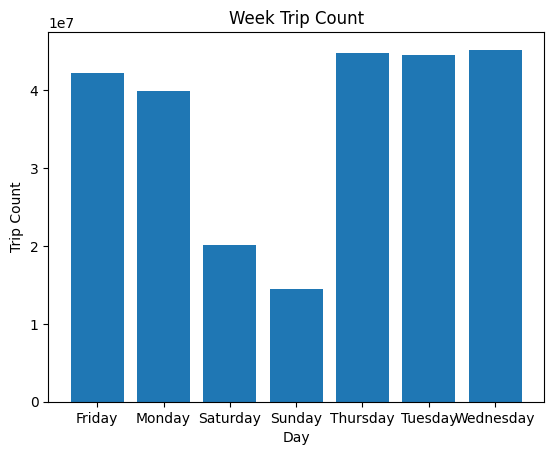

In [21]:
plt.bar(grouped.index, grouped.values)
plt.xlabel('Day')
plt.ylabel('Trip Count')
plt.title('Week Trip Count')
plt.show()

In [22]:
# busiest day is Wednesday

### How many people use BART late at night?

In [23]:
import seaborn as sns

<Axes: xlabel='Hour', ylabel='count'>

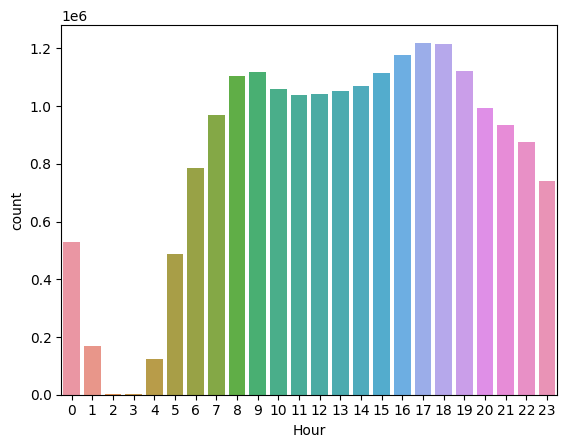

In [24]:
sns.countplot(x=df['Hour'])

In [25]:
filtered_data = df[(df['Hour'] >= 0) & (df['Hour'] <= 5)]
total_passenger_count = filtered_data['Trip Count'].sum()

total_passenger_count

5803819

In [26]:
# 5803819 people 0-5 use Bart


## We calculate the straight line distance between each station

In [27]:
df3=pd.read_csv('station_info.csv')

In [28]:
df3.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [29]:
df3.drop(['Description', 'Name'], axis=1, inplace=True)

In [30]:
df3

,Abbreviation,Location
0,12TH,"-122.271450,37.803768,0"
1,16TH,"-122.419694,37.765062,0"
2,19TH,"-122.268602,37.808350,0"
3,24TH,"-122.418143,37.752470,0"
4,ASHB,"-122.270062,37.852803,0"
5,BALB,"-122.447506,37.721585,0"
6,BAYF,"-122.126514,37.696924,0"
7,CAST,"-122.075602,37.690746,0"
8,CIVC,"-122.414123,37.779732,0"
9,COLS,"-122.196869,37.753661,0"


In [31]:
df3[['Latitude', 'Longitude', 'Altitude']] = df3['Location'].str.split(',', expand=True).astype(float)

df3 = df3.drop('Altitude', axis=1)
df3 = df3.drop('Location',axis=1)  
# here I separated the data in Location into Latitude and Longitude columns

In [32]:
df3

,Abbreviation,Latitude,Longitude
0,12TH,-122.271450,37.803768
1,16TH,-122.419694,37.765062
2,19TH,-122.268602,37.808350
3,24TH,-122.418143,37.752470
4,ASHB,-122.270062,37.852803
5,BALB,-122.447506,37.721585
6,BAYF,-122.126514,37.696924
7,CAST,-122.075602,37.690746
8,CIVC,-122.414123,37.779732
9,COLS,-122.196869,37.753661


In [33]:
import pandas as pd
import math

def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the distance between two points.
    """
    # Conversion in radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Δlat and Δlon calculations
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    #Haversine formula
    a = math.sin(delta_lat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Earth radius (km)
    radius = 6371

    # Distance calculation
    distance = radius * c

    return distance

# Create an empty data frame to calculate distances between stations
distances = pd.DataFrame(columns=['Station1', 'Station2', 'Distance'])


# Calculate the distance for each station pair and add the results to the distances data frame
for i in range(len(df3)):
    for j in range(i+1, len(df3)):
        station1 = df3.loc[i, 'Abbreviation']
        station2 = df3.loc[j, 'Abbreviation']
        lat1 = df3.loc[i, 'Latitude']
        lon1 = df3.loc[i, 'Longitude']
        lat2 = df3.loc[j, 'Latitude']
        lon2 = df3.loc[j, 'Longitude']
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        distances = pd.concat([distances, pd.DataFrame([[station1, station2, distance]], columns=['Station1', 'Station2', 'Distance'])], ignore_index=True)


print(distances)

     Station1 Station2   Distance
0        12TH     16TH  16.644038
1        12TH     19TH   0.417475
2        12TH     24TH  16.594540
3        12TH     ASHB   2.915261
4        12TH     BALB  20.178291
...       ...      ...        ...
1030     WARM     WDUB  11.686062
1031     WARM     WOAK  43.424600
1032     WCRK     WDUB  19.668929
1033     WCRK     WOAK  26.001852
1034     WDUB     WOAK  41.267809

[1035 rows x 3 columns]


## Build a model that can predict the number of BART commuters between any two stations

In [34]:
# I got the average work and school entry and exit times from the website
# Since there may be people going to work and going to school at 8 in the morning, we will only take the time between 16-18 and 
# Since school dismissal can be until the age of 16, I will be allowed to leave work at 16.
# When I compare this data with the data of 16-18 on Sunday, we will find the average number of people going to work

In [35]:
# Filter recordings between 16:00 and 18:00 on weekdays
filtered_df = df[(df['Day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & 
                 (df['Hour'].isin([16,17, 18]))]

# Calculate the number of trips
trip_count = filtered_df['Trip Count'].sum()

# Divide the number of trips on weekdays at 16,17 and 18 hours by 5
average_trip_count = trip_count / 5


print("Total number of trips made between 16:00 and 18:00 on weekdays:", trip_count)
print("Average daily number of trips made between 16:00 and 18:00 on weekdays:", average_trip_count)

Total number of trips made between 16:00 and 18:00 on weekdays: 63968328
Average daily number of trips made between 16:00 and 18:00 on weekdays: 12793665.6


In [36]:
filtered_df = df[(df['Day_name'].isin(['Sunday'])) & 
                 (df['Hour'].isin([16,17, 18]))]

trip_count_sun = filtered_df['Trip Count'].sum()   #Sunday between 17-18
average_trip_count_sun = trip_count_sun

average_trip_count_sun

3481193

In [37]:
#We subtracted the number of people who went on Sunday from the weekday average
12793665.6 - 3481193

9312472.6

In [38]:
# The average number of people who went to #is is 9312472.6

## We create a model

In [39]:
# Here we only take the dismissal hours from work, there may be students on the way there at 8 in the morning

In [40]:
df

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Day,Day_name
0,0,12TH,12TH,1,2016,1,1,Friday
1,0,12TH,16TH,1,2016,1,1,Friday
2,0,12TH,24TH,4,2016,1,1,Friday
3,0,12TH,ASHB,4,2016,1,1,Friday
4,0,12TH,BALB,2,2016,1,1,Friday
...,...,...,...,...,...,...,...,...
9974090,2,WOAK,POWL,3,2018,1,1,Monday
9974091,2,WOAK,RICH,1,2018,1,1,Monday
9974092,2,WOAK,SBRN,1,2018,1,1,Monday
9974093,2,WOAK,SHAY,2,2018,1,1,Monday


In [41]:
df['Day_name'].value_counts()

Day_name
Friday       3106876
Thursday     3065003
Wednesday    3061023
Tuesday      3029201
Monday       2923456
Saturday     2549205
Sunday       2212993
Name: count, dtype: int64

In [42]:
e={'Monday': 1, 'Tuesday': 2,'Wednesday': 3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

In [43]:
df['Day_name']=df['Day_name'].map(e)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19947757 entries, 0 to 9974094
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   Year                 int32 
 5   Month                int32 
 6   Day                  int32 
 7   Day_name             int64 
dtypes: int32(3), int64(3), object(2)
memory usage: 1.1+ GB


In [45]:
grouped3 = pd.DataFrame()

In [46]:
grouped3 = df[df['Hour'].isin([16, 17, 18])]

In [47]:
grouped3 = grouped3[grouped3['Day_name'].isin([1,2,3,4,5,6])]

In [48]:
grouped3

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Day,Day_name
12643,16,12TH,16TH,6,2016,1,1,5
12644,16,12TH,19TH,1,2016,1,1,5
12645,16,12TH,24TH,3,2016,1,1,5
12646,16,12TH,ASHB,6,2016,1,1,5
12647,16,12TH,BALB,4,2016,1,1,5
...,...,...,...,...,...,...,...,...
9946168,18,WOAK,SANL,1,2017,12,30,6
9946169,18,WOAK,SBRN,1,2017,12,30,6
9946170,18,WOAK,SFIA,3,2017,12,30,6
9946171,18,WOAK,WARM,1,2017,12,30,6


In [49]:
grouped4 = grouped3.groupby(['Hour', 'Origin Station', 'Destination Station', 'Day_name']).agg({'Trip Count': 'sum'}).reset_index()


In [50]:
grouped4

,Hour,Origin Station,Destination Station,Day_name,Trip Count
0,16,12TH,12TH,1,292
1,16,12TH,12TH,2,375
2,16,12TH,12TH,3,390
3,16,12TH,12TH,4,397
4,16,12TH,12TH,5,417
...,...,...,...,...,...
38071,18,WOAK,WOAK,2,175
38072,18,WOAK,WOAK,3,264
38073,18,WOAK,WOAK,4,236
38074,18,WOAK,WOAK,5,276


In [51]:
x=grouped4.drop('Trip Count',axis=1)
y=grouped4[['Trip Count']]

In [52]:
x=pd.get_dummies(x,drop_first=True)

In [53]:
x.shape

(38076, 92)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
       
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

     
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

algo_test(x,y)

,R_Squared,RMSE,MAE
Decision Tree,0.962567,830.131817,241.066176
Extra Tree,0.955058,909.590504,265.317096
KNeighborsRegressor,0.762926,2089.108340,1061.060189
Gradient Boosting,0.724457,2252.232342,1043.707629
Linear,0.572960,2803.837939,1275.232417
Ridge,0.572929,2803.940714,1274.355054
Lasso,0.570261,2812.685215,1263.874460
ElasticNet,0.051291,4179.124551,2093.549152


# Here we got a result of 0.96

# Using this data, BART can plan how many BART Vehicles can travel and where in the future.
# Can increase or decrease the number of workers according to density